# Detección de tarjetas de crédito fraudulentas 

Al haber tantas transacciones día a día, el poder detectar manualmente cuál de ellas es fraudulenta, es una tarea muy difícil. Por ello, es importante la ayuda de un algoritmo que pueda automatizar este proceso. 

Para ello, el presente ejemplo, construye un modelo que busca hacer una clasificación para detectar tarjetas fraudulentas. Se empieza por la recolección y limpieza de los datos, en este caso se usara una base de datos de libre disposición, dicha data contiene transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares de tarjetas europeos.  Después se construye una red neuronal usando MLPClassifier de sklearn. Finalmente se evalúa el modelo mirando su curva ROC.

2. Usos Potenciales:

a) Como se mencionó anteriormente, el primer uso que se le puede dar al día a día es el detectar las tarjetas de crédito fraudulentas. Esto es importante ya que, así como en la actualidad el uso de métodos de pagos digital se ha magnificado a una escala sin precedentes, también han aumentado el número de tarjetas de créditos falsas. Esto ha afectado tanto a los usuarios como a los proveedores de crédito. 

b)Este modelo puede servir de base para buscar soluciones a otros problemas de clasificación. Por ejemplo para detectar spams o usuarios falsos en las redes. También puede mejorarse al añadir más funciones que por ejemplo ayuden al estudio del comportamiento del consumidor a lo largo del tiempo.

3. Código Python:

Importamos los paquetes necesarios

In [ ]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


En esta sección, agregamos los datos con Pandas y el archivo adjunto

In [ ]:
data = pd.read_csv('/work/creditcard.csv')

Observamos la data, usando el comando head que muestra las 5 primeras filas. El comando Info muestra las características de los datos y finalmente con el comando describe nos muestra las estadísticas descriptivas.

In [ ]:
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.describe(include = 'all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Comprobación de valores nulos y únicos de cada columna en el conjunto de datos

In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
data.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

Dividimos la data para un mejor análisis

In [ ]:
df_X = data.drop('Class',axis = 1)
df_y = data['Class']

Con seaborn, visualizamos los valores que toma Class, el cual se decidirá si es necesario ajustar

0    284315
1       492
Name: Class, dtype: int64

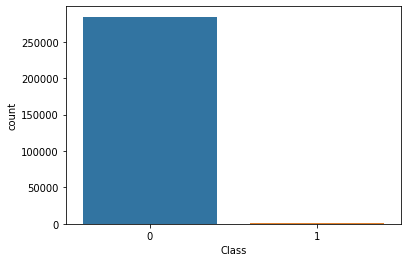

In [ ]:
sns.countplot(x = data['Class'])
data['Class'].value_counts()

Como se puede observar el gráfico la data no esta balanceada, entonces se procede a usar un acercamiento under-sampling

In [ ]:
print("Percentage of 0 is: {zero}".format(zero = round(int(data['Class'].value_counts()[0]) / len(data['Class'])*100,3)))
print('')
print("Percentage of 1 is: {one}".format(one = round(int(data['Class'].value_counts()[1]) / len(data['Class'])*100,3)))

Percentage of 0 is: 99.827

Percentage of 1 is: 0.173


Se ha detectado un 0.173 tarjetas de Fraude

Lo adaptamos al paquete de imblearn para analizar la precisión del modelo

In [ ]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X,y = nm.fit_resample(df_X,df_y)

(984, 30) (984,)


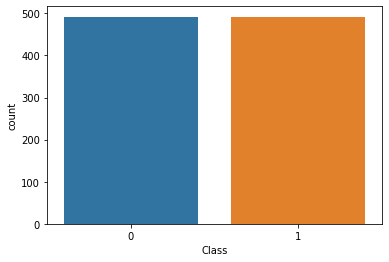

In [ ]:
sns.countplot(x = y)
print(X.shape,y.shape)

Hemos balanceado nuestras variables.

El siguiente paso es entrenar el modelo, para ello usamos sklearn.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42529)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((688, 30), (296, 30), (688,), (296,))

In [ ]:
rs = RobustScaler()
X_train = rs.fit_transform(X_train)
X_test = rs.fit_transform(X_test)

Al tener datos, usamos una red neuronal MLPClassifier para la clasificación, a diferencia de otros algoritmos de este tipo, MLPClassifier se basa en una red neuronal subyacente para realizar la tarea de clasificación. 

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
mlp = MLPClassifier()
mlp.fit(X_train,y_train)

MLPClassifier()

In [ ]:
pred = mlp.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test,pred)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       143
           1       0.98      0.95      0.97       153

    accuracy                           0.97       296
   macro avg       0.97      0.97      0.97       296
weighted avg       0.97      0.97      0.97       296



Text(0.5, 15.0, 'Predicted Values')

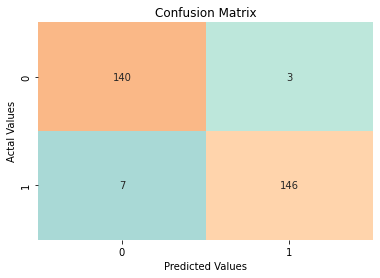

In [ ]:
sns.heatmap(cm, annot = True, fmt = 'g', cbar = False, cmap = 'icefire')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')

Finalmente vemos la precisión de nuestra estimación:

In [ ]:
print(round(accuracy_score(y_test,pred),4))

0.9662


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=57beec60-0533-4a75-9762-ef88023f4883' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>